## Real Data Analysis

1. Priority is on density estimates so analyze how the model performs on the overall flights (mean density, sd density - summary statistic, boxplot). Look how density estimates (point estimates) change with **area**, number of encounters, between **locations**, **speed**, **animals** perhaps. I can perhaps do an sd for locations. 

2. Summary stats relating to what was seen/flight logistics. A log would be good and it sets parameters for the simulated model but remember - It's about the model!

### Import Data

* Start total count and species count tables
* Frequency plots

In [234]:
rm(list=ls())

suppressMessages(library(dplyr))
library(tidyr)
library(geosphere)
suppressMessages(library(reshape2))
library(ggplot2)
library(ggthemes)
library(xtable)


# Import cleaned datasets from the Data_Wrangling
source('Data_Wrangling.R')

# Import original files for duration 
original_biot <- read.csv("../Data/Metadata/BIOT/BIOT_2018.csv", header = T)
original_biot <- subset(original_biot, original_biot$Flight.or.Grounded == 'Flight') # All images in flight
# Subset by particular flights
flights_chosen <- c(1,3,7,8,10,11,12)
original_biot <- original_biot[original_biot$Flight %in% flights_chosen,]
original_belize <- belize
#original_belize

In [245]:
# Total counts

biot_sum <- biot_lite %>%
  group_by(Flight) %>% 
  tally(c(Reefshark, Nurseshark, Whaleshark, Eagleray, Mantaray, Whitetern, 
          Sootytern, Tern_other, Redfootedboobie, Frigatebird, Brownnoddy_any, 
          Bird, FruitBat, Human))

belize_sum <- belize_lite %>%
  group_by(Flight) %>% 
  tally(c(eagle.ray,turtle,manatee,shark,ray))


total_count <- rbind(biot_sum, belize_sum)
# Rename Belize flights
total_count[8,1] <- 13
total_count[9,1] <- 14
total_count[10,1] <- 15
total_count[11,1] <- 16
total_count[12,1] <- 17
total_count[13,1] <- 18

#total_count



biot_sum2 <- biot_lite2 %>%
  group_by(Flight) %>% 
  tally(c(Reefshark, Nurseshark, Whaleshark, Eagleray, Mantaray, Whitetern, 
          Sootytern, Tern_other, Redfootedboobie, Frigatebird, Brownnoddy_any, 
          Bird, FruitBat, Human))

belize_sum2 <- belize_lite2 %>%
  group_by(Flight) %>% 
  tally(c(eagle.ray,turtle,manatee,shark,ray))


total_count2 <- rbind(biot_sum2, belize_sum2)
# Rename Belize flights
total_count2[8,1] <- 13
total_count2[9,1] <- 14
total_count2[10,1] <- 15
total_count2[11,1] <- 16
total_count2[12,1] <- 17
total_count2[13,1] <- 18


In [246]:
# Different counts among species

Species_count_biot <- biot_lite %>%
  group_by(Flight) %>% 
  summarise(Reef_shark = sum(Reefshark),
            Nurse_shark = sum(Nurseshark),
            Whale_shark = sum(Whaleshark),
            Eagleray = sum(Eagleray),
            Mantaray = sum(Mantaray),
            White_tern = sum(Whitetern),
            Sooty_tern = sum(Sootytern),
            Tern_other = sum(Tern_other),
            Redfooted_boobie = sum(Redfootedboobie),
            Frigate_bird = sum(Frigatebird),
            Brown_noddy_any = sum(Brownnoddy_any),
            Bird = sum(Bird))

Species_count_belize <- belize_lite %>%
  group_by(Flight) %>% 
  summarise(Eagle_ray = sum(eagle.ray),
            Turtle = sum(turtle), 
            Manatee = sum(manatee),
            Shark = sum(shark),
            Ray  = sum (ray))

Species_count_biot
Species_count_belize

# Do flight 8 on its own or categorize species (megafauna, birds)
# Sharks and rays can be comparable across flights in Belize and BIOT. Birds are different

Flight,Reef_shark,Nurse_shark,Whale_shark,Eagleray,Mantaray,White_tern,Sooty_tern,Tern_other,Redfooted_boobie,Frigate_bird,Brown_noddy_any,Bird
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,0,0,0,0,0,0,0,2,0,0,0
3,1,0,0,0,0,0,0,2,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0
8,0,6,0,1,0,0,4550,348,525,25,144,28
10,0,0,1,0,1,0,0,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0


Flight,Eagle_ray,Turtle,Manatee,Shark,Ray
<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,2,0,0,0
2,0,0,0,0,2
3,0,0,2,0,0
4,2,0,0,0,0
5,0,0,2,0,0
6,2,0,0,0,0


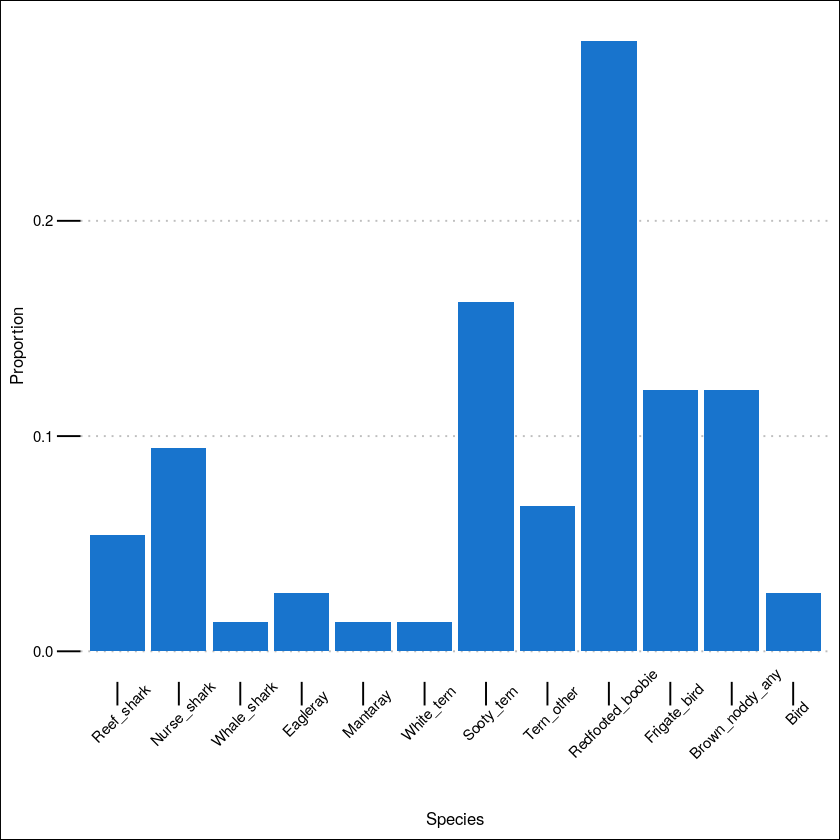

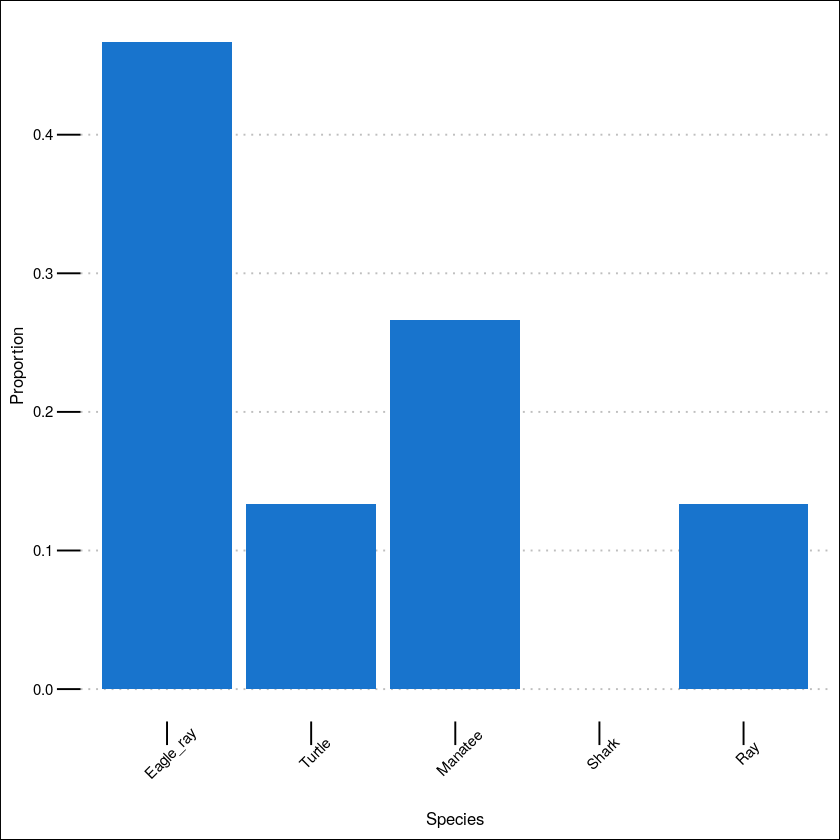

In [247]:
##################### Species Count Barplot ##########################

# Convert all captures to presence/ absent data as the number of individuals does not matter
biot_pa <- biot_lite

columns_to_change <- biot_lite[,c("Reefshark", "Nurseshark", "Whaleshark", "Eagleray", "Mantaray", 
                                  "Whitetern", "Sootytern", "Tern_other", "Redfootedboobie", "Frigatebird", 
                                  "Brownnoddy_any", "Bird")]
cols <- columns_to_change %>% mutate_if(is.numeric, ~1 * (. > 0))
biot_pa[,c("Reefshark", "Nurseshark", "Whaleshark", "Eagleray", "Mantaray", 
                                  "Whitetern", "Sootytern", "Tern_other", "Redfootedboobie", "Frigatebird", 
                                  "Brownnoddy_any", "Bird")] <- cols
#biot_pa <- biot_pa[,-grep("Total", colnames(biot_pa))] # Remove total columns


belize_pa <- belize_lite

bel_cols <- belize_lite[,c("eagle.ray", "turtle", "manatee", "shark", "ray")]
b_cols <- bel_cols %>% mutate_if(is.numeric, ~1 * (. > 0))
belize_pa[,c("eagle.ray", "turtle", "manatee", "shark", "ray")] <-bel_cols



Species_count1 <- biot_pa %>%
  group_by(Flight) %>% 
  summarise(Reef_shark = sum(Reefshark),
            Nurse_shark = sum(Nurseshark),
            Whale_shark = sum(Whaleshark),
            Eagleray = sum(Eagleray),
            Mantaray = sum(Mantaray),
            White_tern = sum(Whitetern),
            Sooty_tern = sum(Sootytern),
            Tern_other = sum(Tern_other),
            Redfooted_boobie = sum(Redfootedboobie),
            Frigate_bird = sum(Frigatebird),
            Brown_noddy_any = sum(Brownnoddy_any),
            Bird = sum(Bird))


Species_count2 <- belize_pa %>%
  group_by(Flight) %>% 
  summarise(Eagle_ray = sum(eagle.ray),
            Turtle = sum(turtle), 
            Manatee = sum(manatee),
            Shark = sum(shark),
            Ray  = sum (ray))


# Transpose dataframe for graphing
sp.bar <- data.frame(t(Species_count1[-1])) # Transpose
colnames(sp.bar) <- unlist(Species_count1[,1]) # Column names = flight.no
sp.bar$Total <- apply(sp.bar, 1, function(x) sum(x)) # Total 
sp.bar$Prop <- lapply(sp.bar$Total, function(x) x/sum(sp.bar$Total))

                      
# Transpose dataframe for graphing
sp.bar_bel <- data.frame(t(Species_count2[-1])) # Transpose
colnames(sp.bar_bel) <- unlist(Species_count2[,1]) # Column names = flight.no
sp.bar_bel$Total <- apply(sp.bar_bel, 1, function(x) sum(x)) # Total 
sp.bar_bel$Prop <- lapply(sp.bar_bel$Total, function(x) x/sum(sp.bar_bel$Total))
                          
#pdf(file = paste("../Results/Frequency.pdf", sep = ""))
#print(ggplot(data = sp.bar, aes(x = rownames(sp.bar), y = Prop)) +
  #geom_bar(stat = "identity", fill = "dodgerblue3") +
  #xlab("Species") +
  #ylab("Proportion") +
  #scale_x_discrete(limits = rownames(sp.bar)) +
  #theme_clean() +
  #theme(axis.text.x = element_text(angle = 50), axis.ticks.length = unit(.5, "cm"))) 

#dev.off()


bar.plot_biot <- ggplot(data = sp.bar, aes(x = rownames(sp.bar), y = Prop)) +
  geom_bar(stat = "identity", fill = "dodgerblue3") +
  xlab("Species") +
  ylab("Proportion") +
  scale_x_discrete(limits = rownames(sp.bar)) +
  theme_clean() +
  theme(axis.text.x = element_text(angle = 45), axis.ticks.length = unit(.5, "cm")) +
  scale_fill_brewer(palette = "Dark2")
                          

bar.plot_bel <- ggplot(data = sp.bar_bel, aes(x = rownames(sp.bar_bel), y = Prop)) +
  geom_bar(stat = "identity", fill = "dodgerblue3") +
  xlab("Species") +
  ylab("Proportion") +
  scale_x_discrete(limits = rownames(sp.bar_bel)) +
  theme_clean() +
  theme(axis.text.x = element_text(angle = 45), axis.ticks.length = unit(.5, "cm")) 
  #scale_fill_brewer(palette = "Dark1")

bar.plot_biot
bar.plot_bel
#rownames(sp.bar_bel)
#sp.bar_bel
#sp.bar

#### Original Duration per flight 

In [248]:
################## Calculate Elapsed Time in Seconds #####################


# Original metadata file duration
# Can I use the full flight biot time on the biot_lite dataset? I would say yes because the overlap is only to fix encounter rate and calculate area
# Full flight duration used to calculate accurate speed


Duration_per_flight <- function(df){
    time <- df %>% 
        group_by(Flight) %>%
            summarise(Duration = length(Flight))
    
    return(time[,2])
}


Images_biot <- Duration_per_flight(original_biot)
# Belize duration from LOG_BELIZE_FLIGHTS.xlsx acording to observer (first 10 flights)
Duration <- rbind(Images_biot, (18*60), (20*60), (15*60), (12*60), (15*60), (25*60))

total_count <- cbind(total_count, Duration)
total_count2 <- cbind(total_count2, Duration)

Duration_minutes <- lapply(Duration, function(x) {x/60})
total_count <- cbind(total_count, Duration_minutes$Duration)
total_count2 <- cbind(total_count2, Duration_minutes$Duration)

#total_count
#total_count2

### Calculate Distance 

In [249]:
################## Calculate Distance in Metres #########################


# Geodesic distance between two points specified by radian latitude/longitude
# VincentyEllipsoid formula specified as most accurate
# Was stuck between calculating distance with full biot or biot_lite 
# Would use biot to account for full distance (specifically at end of flight) but as t is being factored into area later...



Calculate_dist_per_flight <- function(flight_no, d){
  # Distance calculated in metres
  df <- subset(d, d$Flight == flight_no, select = c(Lat, Long))
  pts <- df[c("Long", "Lat")] # Dataframes lagged by one point so as to calculate distance
  segDists <- distVincentyEllipsoid(p1 = pts[-nrow(df),], 
                                    p2 = pts[-1,])
  return(sum(segDists))
}


Calculate_distance <- function(df){
  Distance <- c()
  Flight_no <- c()
  Flights <- unique(df$Flight)
  for(i in Flights){
    Flight_no <- c(Flight_no, i)
    dist <- Calculate_dist_per_flight(i, df)
    Distance <- c(Distance, dist)
  }
  x <- cbind.data.frame(Flight_no, Distance)
  return(x)
}


# Add vector to df
Distance_BIOT <- Calculate_distance(original_biot)
Distance_belize <- Calculate_distance(original_belize)
Distance <- rbind(Distance_BIOT, Distance_belize)

f7 <- 10.7*1000
f8 <- 13.1*1000
#f10 <- 5.74*1000
f11 <- 33.5*1000
f12 <- 33.5*1000

# Use recorded distances on log instead of calculated - slightly off but who knows.
#f13 <- 10.89*1000

Distance[3,2] <- f7
Distance[4,2] <- f8
#Distance[5,2] <- f10
Distance[6,2] <- f11
Distance[7,2] <- f12

total_count <- cbind(total_count, Distance$Distance)
total_count <- cbind(total_count, Distance$Distance/1000)

total_count2 <- cbind(total_count2, Distance$Distance)
total_count2 <- cbind(total_count2, Distance$Distance/1000)

names(total_count)[2] <- "Captures"
names(total_count)[3] <- "Duration_(seconds)"
names(total_count)[4] <- "Duration_(minutes)"
names(total_count)[5] <- "Distance_(metres)"
names(total_count)[6] <- "Distance_(km)"

names(total_count2)[2] <- "Captures"
names(total_count2)[3] <- "Duration_(seconds)"
names(total_count2)[4] <- "Duration_(minutes)"
names(total_count2)[5] <- "Distance_(metres)"
names(total_count2)[6] <- "Distance_(km)"

# Speed was calculated as distance over time, distance calculated mostly
# using formula (bar: 7,8,11,12). Time calculated from number of images
# except for Belize.
total_count <- total_count %>% mutate(Speed <- (total_count [,5]/ total_count [,3]))
total_count <- total_count %>% mutate(Speed <- (total_count [,5]/ total_count [,3]) * 3.6)

names(total_count)[7] <- "Average_Speed_(m/s)"
names(total_count)[8] <- "Average_Speed_(km/h)"

total_count

total_count2 <- total_count2 %>% mutate(Speed <- (total_count2 [,5]/ total_count2 [,3]))
total_count2 <- total_count2 %>% mutate(Speed <- (total_count2 [,5]/ total_count2 [,3]) * 3.6)

names(total_count2)[7] <- "Average_Speed_(m/s)"
names(total_count2)[8] <- "Average_Speed_(km/h)"

#total_count2

Flight,Captures,Duration_(seconds),Duration_(minutes),Distance_(metres),Distance_(km),Average_Speed_(m/s),Average_Speed_(km/h)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,429,7.150000,1718.5112,1.7185112,4.0058535,14.421073
3,3,735,12.250000,8892.4914,8.8924914,12.0986277,43.555060
7,2,1185,19.750000,10700.0000,10.7000000,9.0295359,32.506329
8,5627,1126,18.766667,13100.0000,13.1000000,11.6341030,41.882771
10,2,314,5.233333,130.5973,0.1305973,0.4159151,1.497294
11,2,1042,17.366667,33500.0000,33.5000000,32.1497121,115.738964
12,13,1224,20.400000,33500.0000,33.5000000,27.3692810,98.529412
13,5,1080,18.000000,17100.2963,17.1002963,15.8336077,57.000988
14,2,1200,20.000000,12372.2725,12.3722725,10.3102271,37.116817


## Area calculations and Total table

In [250]:
#################################### FOV ###############################################


# Sensor dimensions for 1/2.3" as specified in VIRB spec(wikipedia page: https://en.wikipedia.org/wiki/Image_sensor_format)
# Width = 6.17 mm
# Height = 4.55 mm
# Flight altidude calculated in BIOT_Explore according to 6 decent TLOGS : 49.84m = 50m
# Belize Alt - must remove incorrect altitudes
original_belize <- subset(original_belize, original_belize$Altitude < 200)


# Garmin (BIOT)
g_sensor.h <- 4.55
g_sensor.v <- 6.17
g_f <- 2.73
g_alt <- 50

# Sony DSLR ILCE-5100 (Maldives)
s_sensor.h <- 23.5
s_sensor.v <- 15.6
s_f <- 16
s_alt <- 77.5

# Sony RX0 Nadir (Belize)
n_sensor.h <- 13.2
n_sensor.v <- 18.88
n_f <- 7.7
n_alt <- mean(original_belize$Altitude)


g_coverage.h <- (g_sensor.h/g_f)*g_alt
g_coverage.v <- (g_sensor.v/g_f)*g_alt

s_coverage.h <- (s_sensor.h/s_f)*s_alt
s_coverage.v <- (s_sensor.v/s_f)*s_alt

n_coverage.h <- (n_sensor.h/n_f)*n_alt
n_coverage.v <- (n_sensor.v/n_f)*n_alt

garmin_m2 <- g_coverage.h * g_coverage.v
sony_m2 <- s_coverage.h * s_coverage.v
nadir_m2 <- n_coverage.h * n_coverage.v

cols <- c('Camera Model', 'Sensor Height (mm)', 'Sensor Width (mm)', 'Focal Length (mm)', 'Mean Flight Altitude (m)', 'Field of View (m2)')
row1 <- c('Garmin VIRB Ultra 3.0', 4.55, 6.17, 2.73, 50, round(garmin_m2,2))
row2 <- c('Sony DSLR ILCE-5100', 23.5, 15.6, 16, 77.5, round(sony_m2, 2))
row3 <- c('Sony RX0 Nadir', 13.2, 18.88, 7.7, 90, round(nadir_m2, 2))

fov_table <- rbind(cols, row1, row2, row3)
fov_table

#fov_table <- xtable(fov_table, type ="latex")
#align(table3) <- "lc|ccccc"
#print(fov_table, floating = F, caption.placement = "top", file = "../Writeup/FOV_table.tex",
#             include.rownames = F, scalebox = '0.6', sanitize.text.function = function(x){x}, width = 6)


cols,Camera Model,Sensor Height (mm),Sensor Width (mm),Focal Length (mm),Mean Flight Altitude (m),Field of View (m2)
row1,Garmin VIRB Ultra 3.0,4.55,6.17,2.73,50,9416.97
row2,Sony DSLR ILCE-5100,23.5,15.6,16,77.5,8601.14
row3,Sony RX0 Nadir,13.2,18.88,7.7,90,34121.98


In [251]:
###################################### Calculate Area ############################################

# Two different methodologies here - practically analogous but not producing the same figures??
# gREM method changed to account for a moving sensor
# Strip sampling method which is more realisitc

# Duration of pseudo-flight, i.e number of images for calcArea
pseudo_BIOT <-  Duration_per_flight(biot_lite)
pseudo_belize <-  Duration_per_flight(belize_lite)
pseudo_duration <- rbind(pseudo_BIOT, pseudo_belize)
#pseudo_duration

pseudo_garmin <- pseudo_duration[1:5,]
pseudo_sony <- pseudo_duration[6:7,]
pseudo_nadir <- pseudo_duration[8:13,]

pseudo_BIOT2 <-  Duration_per_flight(biot_lite2)
pseudo_belize2 <-  Duration_per_flight(belize_lite2)
pseudo_duration2 <- rbind(pseudo_BIOT2, pseudo_belize2)
#pseudo_duration2

pseudo_garmin2 <- pseudo_duration2[1:5,]
pseudo_sony2 <- pseudo_duration2[6:7,]
pseudo_nadir2 <- pseudo_duration2[8:13,]


calcArea <- function(FOV, no_images){
  #Calculate area per survey in metres squared
  #Average covered by camera which is influenced by altitude and position (tilt, roll, pitch)

  #FOV: calculated for each camera model (2rv)
  return (A <- (FOV * no_images))
}


Flight_Area_m2 <- function(no.images, fov){
  return(Area <- sapply(no.images, function(x) calcArea(fov, x)))
}


# Get total area m2
Area_BIOT <- Flight_Area_m2(pseudo_garmin, garmin_m2)
Area_MAL <- Flight_Area_m2(pseudo_sony, sony_m2)
Area_Bel <- Flight_Area_m2(pseudo_nadir, nadir_m2)

Area_BIOT2 <- Flight_Area_m2(pseudo_garmin2, garmin_m2)
Area_MAL2 <- Flight_Area_m2(pseudo_sony2, sony_m2)
Area_Bel2 <- Flight_Area_m2(pseudo_nadir2, nadir_m2)
                        
gREM_Area <- c(Area_BIOT, Area_MAL, Area_Bel)
gREM_km <- sapply(gREM_Area, function(x) x/1000)
#total_count <- cbind(total_count, gREM_km)

gREM_Area2 <- c(Area_BIOT2, Area_MAL2, Area_Bel2)
gREM_km2 <- sapply(gREM_Area2, function(x) x/1000)
                  
# Strip sampling area
Strip_Area_m2 <- function(df, fov_width){
  Area_m2 <- sapply(df$`Distance_(metres)`, function (x) x * fov_width)
  return(Area_m2)
}

# Must take distance from total_count table
garmin_dists <- total_count[1:5,] 
sony_dists <- total_count[6:7,] 
nadir_dists <- total_count[8:13,]  


strip_garmin <- Strip_Area_m2(garmin_dists, g_coverage.h)
strip_sony <- Strip_Area_m2(sony_dists, s_coverage.h)
strip_nadir <- Strip_Area_m2(nadir_dists, n_coverage.h)
strip_area <- c(strip_garmin, strip_sony, strip_nadir)
Strip_km <- sapply(strip_area, function(x) x/1000)

                   
Area_compare <- cbind(gREM_km, Strip_km)
#Area_compare

Area_compare2 <- cbind(gREM_km2, Strip_km)
#Area_compare2
                   
total_count[,9] <-  gREM_km
total_count[,10] <- Strip_km
names(total_count)[9] <- "gREM_Area(km2)"
names(total_count)[10] <- "Strip_Area(km2)"

total_count2[,9] <-  gREM_km2
total_count2[,10] <- Strip_km
names(total_count2)[9] <- "gREM_Area(km2)"
names(total_count2)[10] <- "Strip_Area(km2)"
                   
#total_count
#total_count2
                   
sub1 <- total_count %>%
                   select(c("Flight", "Captures", "Duration_(seconds)", "Distance_(km)", "gREM_Area(km2)", "Strip_Area(km2)"))
sub2 <- total_count2 %>%
                   select(c("Flight", "Captures", "Duration_(seconds)", "Distance_(km)", "gREM_Area(km2)", "Strip_Area(km2)"))

#sub1
#sub2

#write.table(sub1, file = "../Results/Overlap1.txt", sep = ",", quote = FALSE, row.names = F)
#write.table(sub2, file = "../Results/Overlap2.txt", sep = ",", quote = FALSE, row.names = F)

In [252]:
# Another idea is to recalculate overlap using speed
# Divide camera width by the average spped to see how many images it
# would take to travel the width of the image to a 'new' image.

#camera <- c((rep('garmin', each=5)), (rep('sony', each=2)), (rep('nadir', each=6)))

#table <- as.data.frame(cbind(camera, total_count$`Average_Speed_(m/s)`))


#overlap <- c()
#for(i in 1:nrow(table)){
#    if(table[i,1] == 'garmin'){
#        o_val <- ceiling(113/as.numeric(table[i,2]))
#        overlap <- c(overlap, o_val)
#    }
#     if(table[i,1] == 'sony'){
#        o_val <- ceiling(114/as.numeric(table[i,2]))
#        overlap <- c(overlap, o_val)
#    }
#     if(table[i,1] == 'nadir'){
#        o_val <- ceiling(154/as.numeric(table[i,2]))#
#
#        overlap <- c(overlap, o_val)
#    }
#}

total_count$`Strip_Area(km2)`

[1]  143.20926  741.04095  891.66667 1091.66667   10.88311 3813.24219
 [7] 3813.24219 2641.23313 1910.96430 2211.10728 1616.19211 1992.41511
[13] 1632.30598

### Calculate Density 

* Using Overlap method 1 and Strip area estimates

#### Density overall (between flights, i.e locations)

In [253]:
#################################### Calculating Density ###########################################


calcDensity <- function(z, A){
  # Calculate density using ideal gas model from capture rate and survey area covered
  # z : The number of encounters/captures.
  # A : Area covered by sensor per unit time.
  
    # Double check parameters
  if(z < 0 | !is.numeric(z)) stop("Number of individuals must be a positive number")
  if (A <= 0 | !is.numeric(A)) stop("Area, A, must be a positive number.")
  # Calculate density
  return(D <- z/A)
}


# Calculate Area (m2) and Density for each flight

Flight_Density <- function(total_df){
  # Calculate area and subsequent density for each flight
  Density_vec <- c()
  for(i in 1:nrow(total_df)){
    # Calculate densities for each area and capture rate
    Density <- calcDensity(total_df$`Captures`[i], total_df$`Strip_Area(km2)`[i])
    Density_vec <- c(Density_vec, Density)
  }
  return(Density_vec)
}



# Calculate densities for each dataset
Density_Estimate_km2 <- Flight_Density(total_count)

total_count <- cbind(total_count, Density_Estimate_km2)
#total_count <- within(total_count, rm(Density_Estimate_m2))

total_count

Flight,Captures,Duration_(seconds),Duration_(minutes),Distance_(metres),Distance_(km),Average_Speed_(m/s),Average_Speed_(km/h),gREM_Area(km2),Strip_Area(km2),Density_Estimate_km2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,429,7.150000,1718.5112,1.7185112,4.0058535,14.421073,809.8596,143.20926,0.0279311542
3,3,735,12.250000,8892.4914,8.8924914,12.0986277,43.555060,2307.1581,741.04095,0.0040483593
7,2,1185,19.750000,10700.0000,10.7000000,9.0295359,32.506329,5584.2643,891.66667,0.0022429907
8,5627,1126,18.766667,13100.0000,13.1000000,11.6341030,41.882771,1327.7930,1091.66667,5.1545038168
10,2,314,5.233333,130.5973,0.1305973,0.4159151,1.497294,339.0110,10.88311,0.1837709786
11,2,1042,17.366667,33500.0000,33.5000000,32.1497121,115.738964,2993.1959,3813.24219,0.0005244881
12,13,1224,20.400000,33500.0000,33.5000000,27.3692810,98.529412,2631.9481,3813.24219,0.0034091724
13,5,1080,18.000000,17100.2963,17.1002963,15.8336077,57.000988,13580.5491,2641.23313,0.0018930552
14,2,1200,20.000000,12372.2725,12.3722725,10.3102271,37.116817,4435.8577,1910.96430,0.0010465920


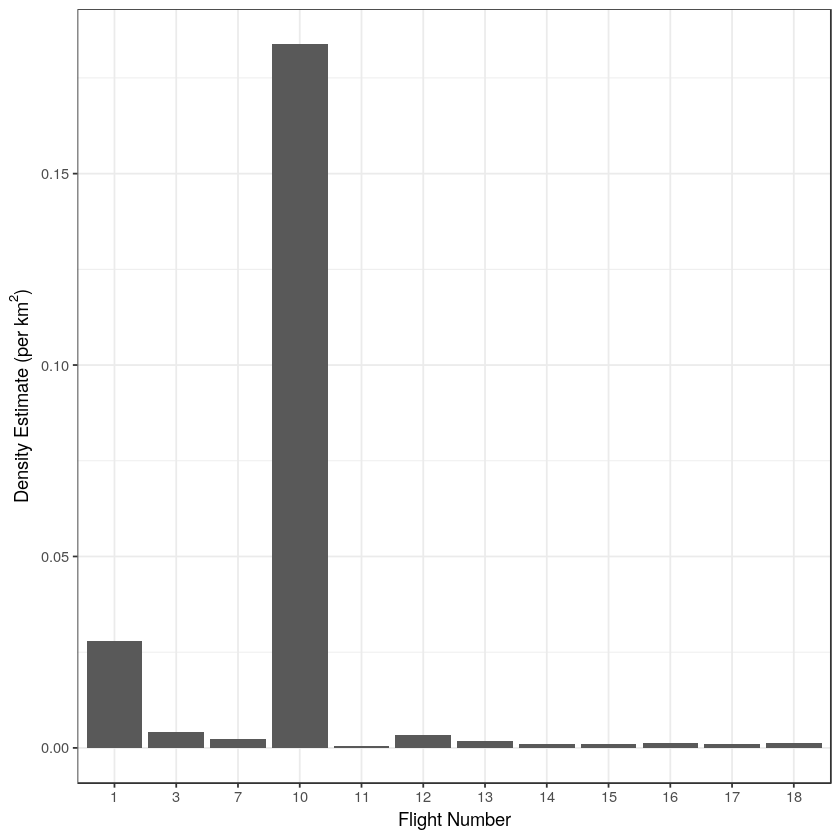

In [335]:
####### Density per flight #######
tc_no8 <- total_count[-4,] # Take out flight 8 (unusually high with all the birds)
#tc_no8 <- tc_no8[-4,] # Take out flight 10 because lots of hits in a short flight?
#tc_no8 <- cbind(a = c(1,2,3,4,5,6,7), tc_no8)
tc_no8$Flight <- as.factor(tc_no8$Flight)
#tc_no8
#pdf(file = paste("../Results/Density_per_flight.pdf", sep = ""))
ggplot(data = tc_no8, aes(x = tc_no8$Flight, y = tc_no8$Density_Estimate_km2)) +
                      geom_bar(stat = 'identity') +
                      xlab("Flight Number") +
                      ylab(expression(paste(
                        "Density Estimate (per ",
                         km^2,
                        ")", sep=""))) +
                      #scale_x_continuous(breaks = c(1, 2, 3, 4, 5, 6, 7)) +
                      theme_bw()
#dev.off()


#hist(tc_no8$Density_Estimate_km2)

Overall density isn't interesting because it's all relative to number of hits and area, right?. We do not have enough data to empirically analyze density trends in the data (except for density with area and speed). It's not exactly comparable but further analysis of trends would be interesting. Can't analyze density across animals as multiple animals were observed during multiple flights. Look how the **trends possibly change between location**???? Possible confounding factors and links to simulated data. 

#### Density vs. Area

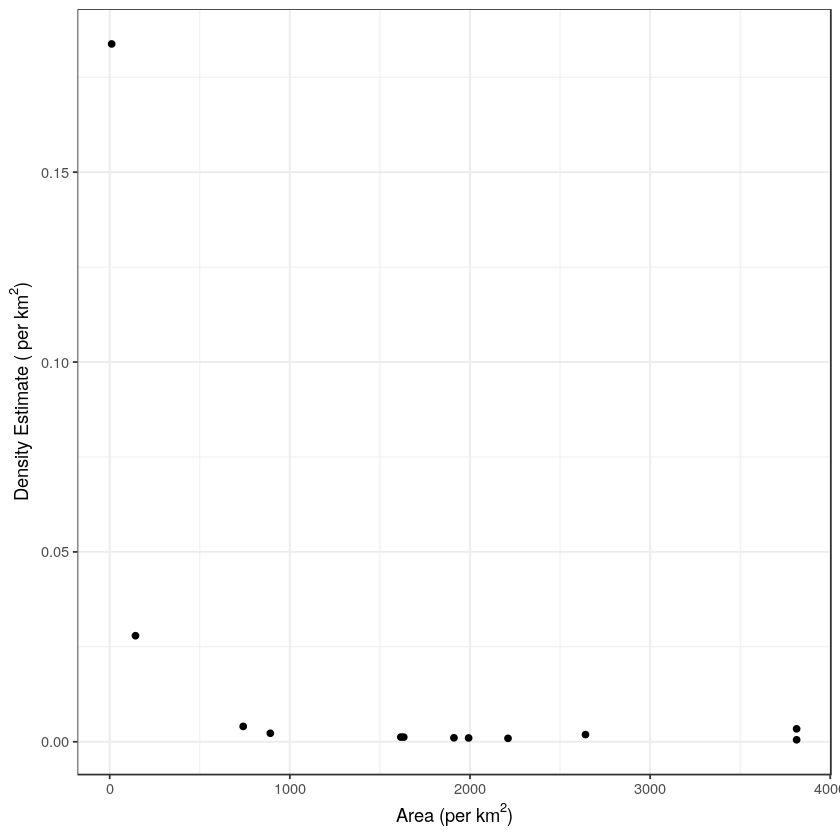

In [337]:
ggplot(data = tc_no8, aes(x = tc_no8$`Strip_Area(km2)`, y = tc_no8$Density_Estimate_km2)) +
  geom_point() +
  xlab(expression(paste(
    "Area (per ",
    km^2,
    ")", sep=""))) +
  ylab(expression(paste(
    "Density Estimate ( per ",
    km^2,
    ")", sep=""))) +
  theme_bw()

#### Density vs Speed?

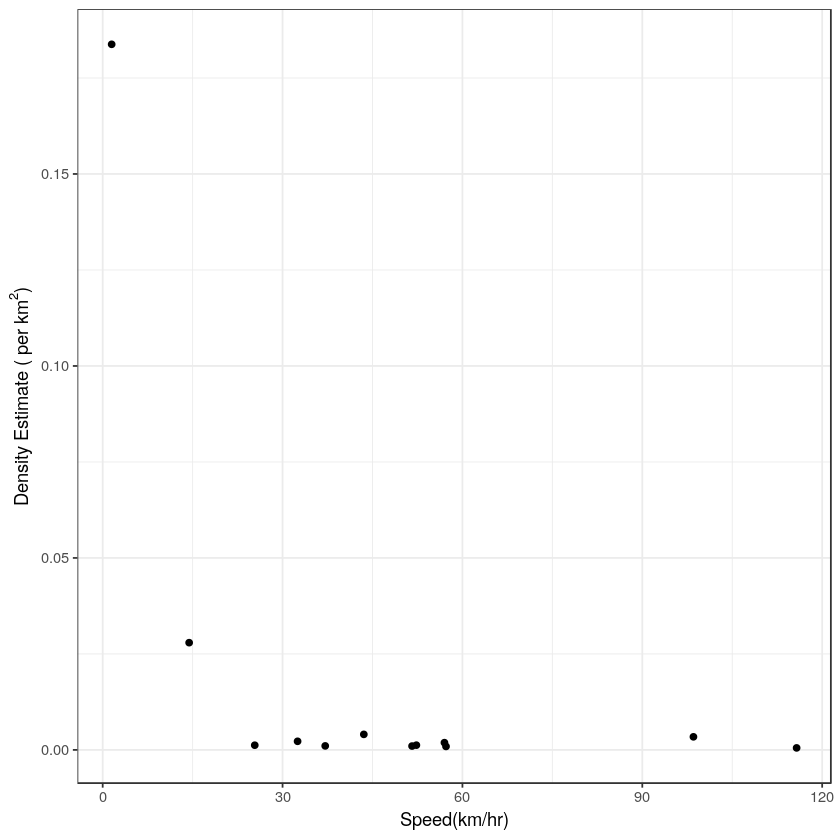

In [338]:
ggplot(data = tc_no8, aes(x = tc_no8$`Average_Speed_(km/h)`, y = tc_no8$Density_Estimate_km2)) +
  geom_point() +
  xlab(
    "Speed(km/hr)") +
  ylab(expression(paste(
    "Density Estimate ( per ",
    km^2,
    ")", sep=""))) +
  theme_bw()

#### Encounters vs. Animal type, Speed, Area

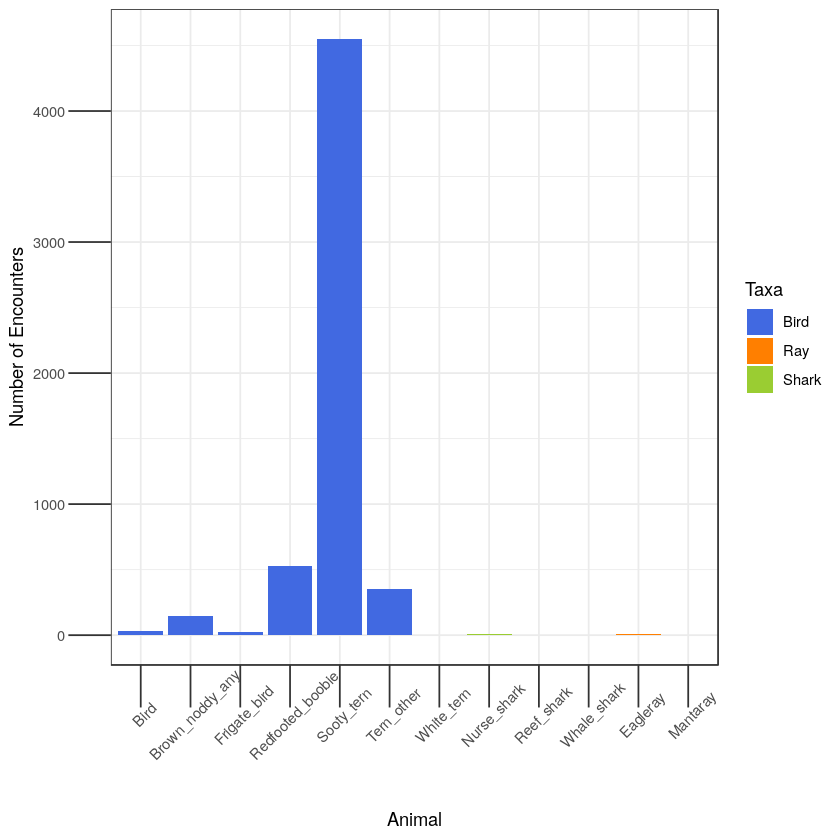

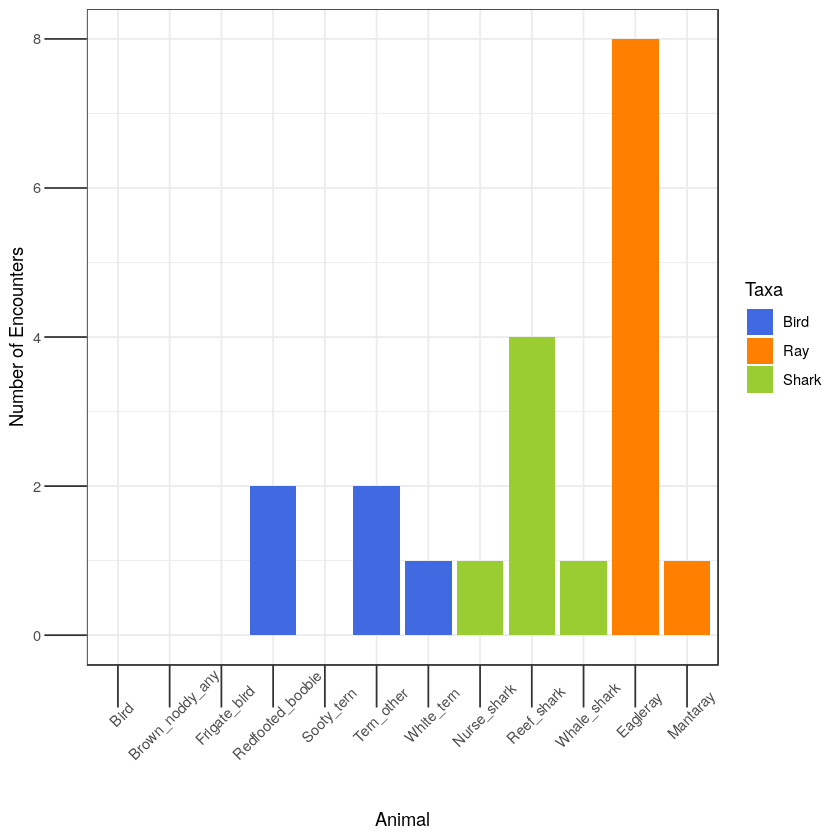

In [365]:
# Should I take out flight 8 in general??
t1 <- Species_count_biot[,-1]
t1.5 <- t1[-4,] # Take out flight 8
t2 <- Species_count_belize[,-1]
names(t2)[1] <- "Eagleray"

t1 <- as.data.frame(colSums(t1))
t1.5 <- as.data.frame(colSums(t1.5))
t2 <- as.data.frame(colSums(t2))

t1$Animal <- rownames(t1)
t1.5$Animal <- rownames(t1.5)
t2$Animal <- rownames(t2)


t3 <- merge(t1, t2, by.x = "Animal", all.x = 'True')
t3.5 <- merge(t1.5, t2, by.x = "Animal", all.x = 'True')
t3[is.na(t3)] <- 0
t3.5[is.na(t3.5)] <- 0
t3 <- as.data.frame(t3)
t3.5 <- as.data.frame(t3.5)
t3[,4] <- apply(t3, 1, function(x) (as.numeric(x[2])) + (as.numeric(x[3])))
t3.5[,4] <- apply(t3.5, 1, function(x) (as.numeric(x[2])) + (as.numeric(x[3])))
t3 <- subset(t3, select = c('Animal', 'V4'))
t3.5 <- subset(t3.5, select = c('Animal', 'V4'))
                  
                  
birds <- c('Bird', 'Brown_noddy_any', 'Frigate_bird', 'Redfooted_boobie', 'Sooty_tern', 'Tern_other', 'White_tern')
sharks <- c('Nurse_shark', 'Reef_shark', 'Whale_shark')
rays <- c('Eagleray', 'Mantaray')

col3 <- c()
for(i in t3[,1]){
    if(i %in% birds){
        col3 <- c(col3, 1)
    }
     if(i %in% sharks){
        col3 <- c(col3, 2)
    }
     if(i %in% rays){
        col3 <- c(col3, 3)
    }
}

t3[,3] <- as.character(col3)
t3 <- t3 %>% 
        group_by(V3) %>%
        arrange(V3, .by_group = TRUE)

    
t3$Animal <- factor(t3$Animal, levels = t3$Animal[order(t3$V3)])
                  
col3.5 <- c()
for(i in t3.5[,1]){
    if(i %in% birds){
        col3.5 <- c(col3.5, 1)
    }
     if(i %in% sharks){
        col3.5 <- c(col3.5, 2)
    }
     if(i %in% rays){
        col3.5 <- c(col3.5, 3)
    }
}

t3.5[,3] <- as.character(col3.5)

t3.5 <- t3.5 %>% 
        group_by(V3) %>%
        arrange(V3, .by_group = TRUE)
    
t3.5$Animal <- factor(t3.5$Animal, levels = t3.5$Animal[order(t3.5$V3)])

t3$V3[t3$V3 == 1] <- "Bird"
t3$V3[t3$V3 == 2] <- "Shark"  
t3$V3[t3$V3 == 3] <- "Ray"  
                  
t3.5$V3[t3.5$V3 == 1] <- "Bird"
t3.5$V3[t3.5$V3 == 2] <- "Shark"  
t3.5$V3[t3.5$V3 == 3] <- "Ray"

names(t3)[3] <- 'Taxa'
names(t3.5)[3] <- 'Taxa'
                  
ggplot(data = t3, aes(x = t3$Animal, y = t3$V4)) +
  geom_bar(aes(fill = Taxa), stat = 'identity') +
  xlab("Animal") +
  ylab("Number of Encounters") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45), axis.ticks.length = unit(.9, "cm")) +
  scale_fill_manual(values = c("royalblue", "darkorange1", "olivedrab3"))

                  
ggplot(data = t3.5, aes(x = t3.5$Animal, y = t3.5$V4)) +
  geom_bar(aes(fill = Taxa), stat = 'identity') +
  xlab("Animal") +
  ylab("Number of Encounters") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45), axis.ticks.length = unit(.9, "cm")) +
  scale_fill_manual(values = c("royalblue", "darkorange1", "olivedrab3"))
        

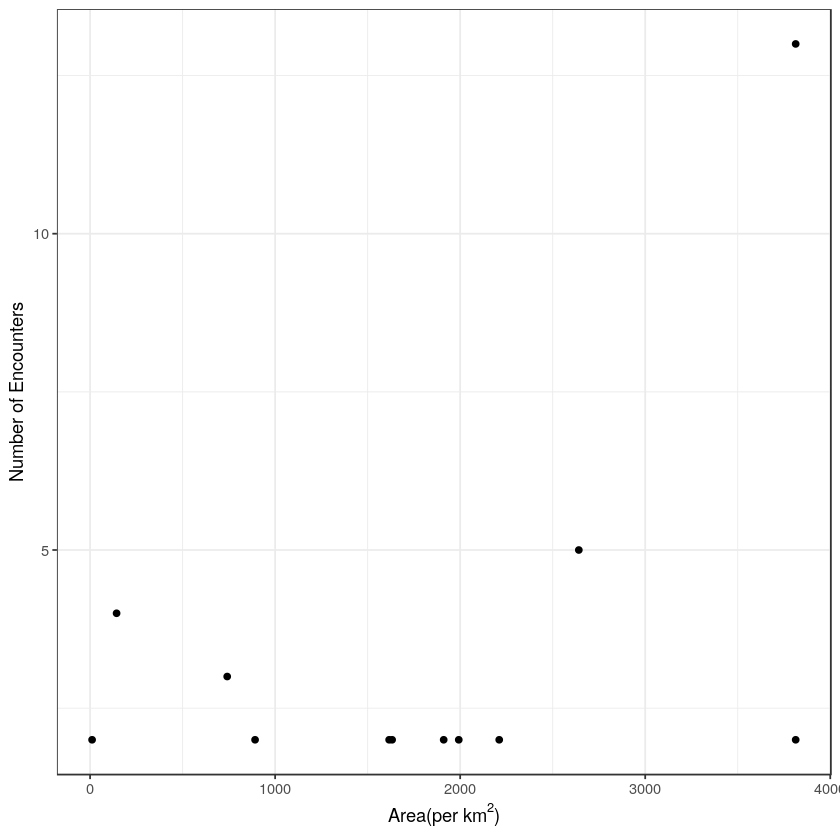

In [340]:
ggplot(data = tc_no8, aes(x = tc_no8$`Strip_Area(km2)`, y = tc_no8$Captures)) +
  geom_point() +
  xlab(expression(paste(
    "Area(per ",
    km^2,
    ")", sep=""))) +
  ylab('Number of Encounters') +
  theme_bw()

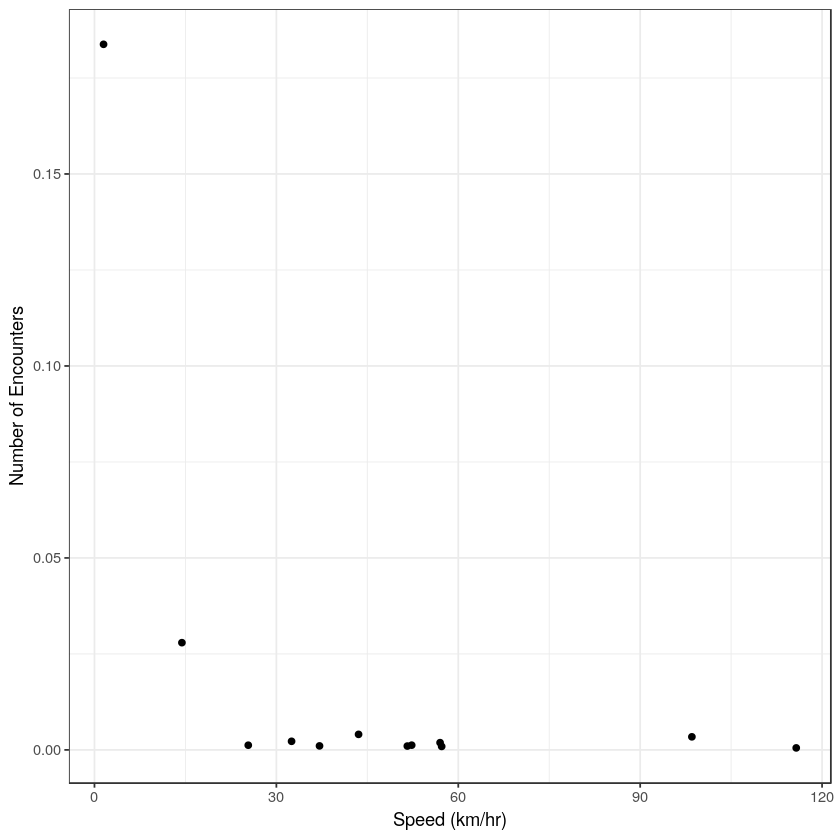

In [343]:
ggplot(data = tc_no8, aes(x = tc_no8$`Average_Speed_(km/h)`, y = tc_no8$Density_Estimate_km2)) +
  geom_point() +
  xlab("Speed (km/hr)") +
  ylab("Number of Encounters") +
  theme_bw()